In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('file.tsv', sep='\t', names=columns)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
titles = pd.read_csv('Movie_Id_Titles.csv')
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(df,titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [9]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

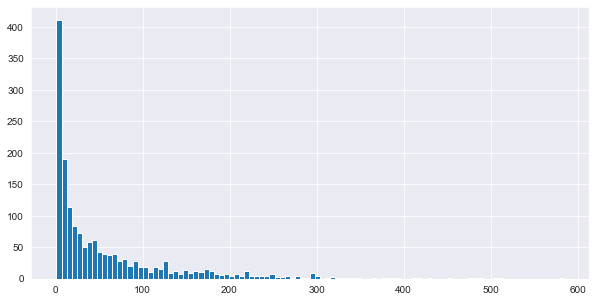

In [10]:
plt.figure(figsize=(10,5))
ratings['num of ratings'].hist(bins=100)

<AxesSubplot:>

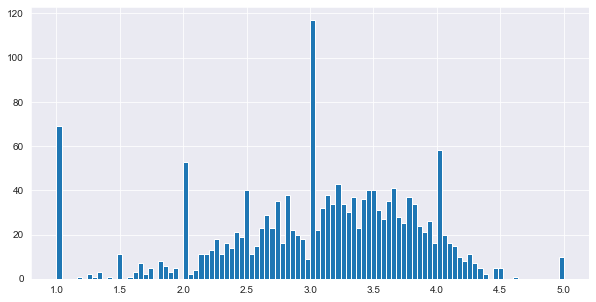

In [11]:
plt.figure(figsize=(10,5))
ratings['rating'].hist(bins=100)

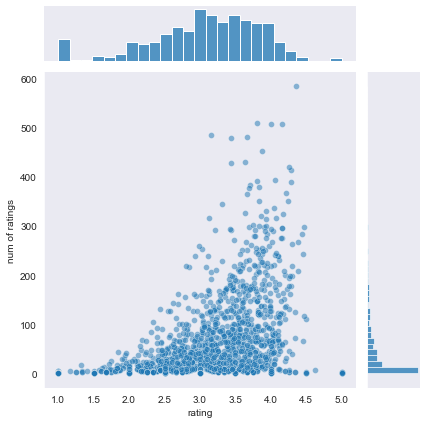

In [12]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

<AxesSubplot:ylabel='title'>

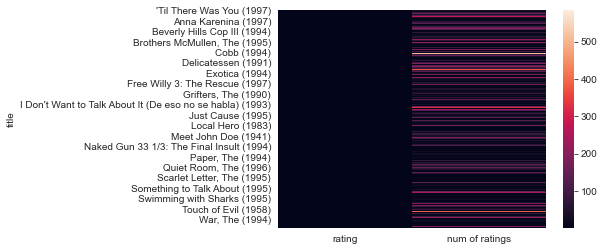

In [13]:
sns.heatmap(data=ratings)

In [14]:
table = df.pivot_table(index='user_id',columns='title',values='rating')
table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [16]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [17]:
def get_movie_recommendation(title):
    rating = table[title]
    similar = table.corrwith(rating)
    corr = pd.DataFrame(similar,columns=['Correlation'])
    corr.dropna(inplace=True)
    corr = corr.join(ratings['num of ratings'])
    return corr[corr['num of ratings']>100].sort_values('Correlation',ascending=False).head()
    

In [19]:
inp='yes'
while(inp=='yes'):
    found=0
    title=input('\n enter movie name: ')
    for i in range(0,len(df.index)):
        if title==df.iloc[i]["title"]:
            found=1
            break
    if(found==1):
        print(get_movie_recommendation(title))
    else:
        print("\n movie not found")
    inp=input('\n do you want to continue yes/no: ')
    if(inp!='yes'):
        break


 enter movie name: 12 Angry Men (1957)
                             Correlation  num of ratings
title                                                   
12 Angry Men (1957)             1.000000             125
Ulee's Gold (1997)              0.619544             184
Rear Window (1954)              0.570513             209
Seven Years in Tibet (1997)     0.549939             155
Clerks (1994)                   0.528173             148

 do you want to continue yes/no: yes

 enter movie name: Liar Liar (1997)
                       Correlation  num of ratings
title                                             
Liar Liar (1997)          1.000000             485
Batman Forever (1995)     0.516968             114
Mask, The (1994)          0.484650             129
Down Periscope (1996)     0.472681             101
Con Air (1997)            0.469828             137

 do you want to continue yes/no: no
